In [1]:
from sklearn import datasets
from sklearn import svm  
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris_dataset = datasets.load_iris()
print ("Iris data set Description :: ", iris_dataset['DESCR'])

Iris data set Description ::  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== 

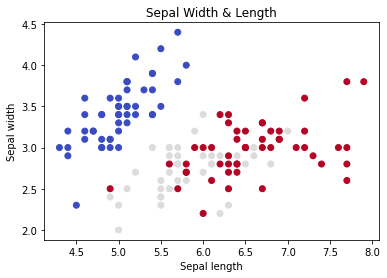

In [6]:
def visuvalize_sepal_data():
    iris = datasets.load_iris()
    X = iris.data[:, :2]
    y = iris.target
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Sepal Width & Length')
    plt.show()
 
visuvalize_sepal_data()

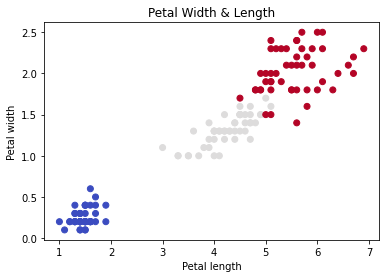

In [7]:
def visuvalize_petal_data():
    iris = datasets.load_iris()
    X = iris.data[:, 2:]  
    y = iris.target
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('Petal Width & Length')
    plt.show()
 
visuvalize_petal_data()

In [9]:
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target
C = 1.0 

svc = svm.SVC(kernel='linear', C=C).fit(X, y)

lin_svc = svm.LinearSVC(C=C).fit(X, y)

rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)

poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

C:\Users\Rajendra\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


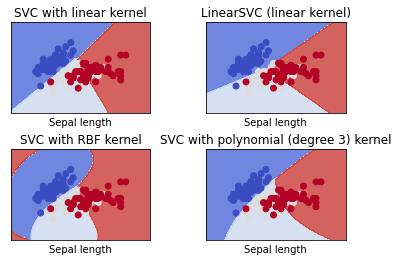

In [12]:
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
  'LinearSVC (linear kernel)',
    'SVC with RBF kernel',
    'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
     plt.subplot(2, 2, i + 1)
     plt.subplots_adjust(wspace=0.4, hspace=0.4)

     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

     Z = Z.reshape(xx.shape)
     plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

     # Plot also the training points
     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
     plt.xlabel('Sepal length')
     plt.xlim(xx.min(), xx.max())
     plt.ylim(yy.min(), yy.max())
     plt.xticks(())
     plt.yticks(())
     plt.title(titles[i])

plt.show()